<a href="https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results?scriptVersionId=119724889" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Telco Churn - EDA & Model (Voting + boosting)<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">♞ Stacking classifier - ensemble model for great results ♞</div>

In [1]:
from IPython.display import Image
#Image by https://www.pexels.com/pl-pl/zdjecie/sztuka-kobiety-granie-muzyka-7097455/

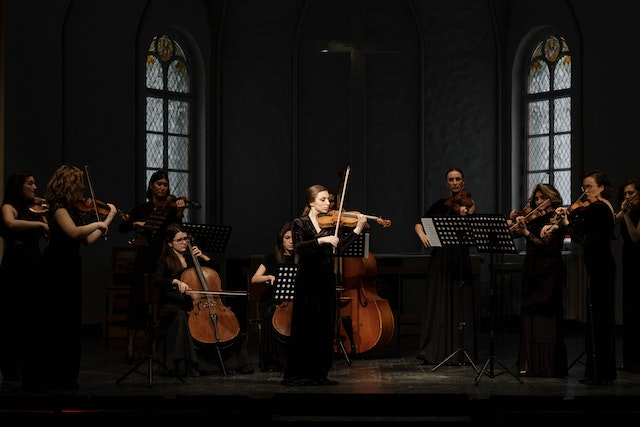

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Table of Contents</div>

<a id="toc"></a>
- [1. Unity is strength - introduction](#1)
    - [1.1 Voting vs Stacking](#1.1)
    - [1.2 Stacking vs bagging and boosting](#1.2)
    - [1.3 Framework](#1.3)
    - [1.4 Tuning hyperparameters in ensemble learning](#1.4)
- [2. Set-up](#2)
    - [2.1 Import Libraries](#2.1)
    - [2.2 Import Data](#2.2)
    - [2.3 Data Set Characteristics](#2.3)
    - [2.4 Dataset Attributes](#2.4)
- [3. Data preprocessing](#3)
    - [3.1 Dealin with missing values in TotalCharges](#3.1)
    - [3.2 Dealing with duplicate values](#3.2)
    - [3.3 Creating numerical and categorical lists](#3.3)
- [4. Feature Engineering](#4)
    - [4.1 Train test split - stratified splitting](#4.1)
    - [4.2 Feature scaling](#4.2)
    - [4.3 One hot Encoding](#4.3)
        - [4.3.1 X_train encoding](#4.3.1)
        - [4.3.2 X_test encoding](#4.3.2)
- [5. Model building](#5)
    - [5.1 Level-0 with 28 Models](#5.1)
    - [5.2 Level-1 Model](#5.2)
    - [5.3 Create a stacking classifier](#5.3)
    - [5.4 AUC-ROC Curve](#5.4)
    - [5.5 Precision-Recall Curve (PR curve)](#5.5)
    - [5.6 This is just the beginning](#5.6)
- [6. My other notebooks](#6)
- [7. References](#7)

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span> Unity is strength - introduction</div>

A stacking classifier is an ensemble method where the output from multiple classifiers is passed as an input to a meta-classifier for the task of the final classification. The individual classification models are trained based on the complete training set, then the meta-classifier is fitted based on the outputs (meta-features) of the individual classification models.


<div style=" background-color:#3b3745;
            text-align:left;
            margin: auto;
            padding: 13px 13px; 
            border-radius: 8px; 
            color: white">
<ul>
<b>Ensemble learning</b> is a machine learning technique that combines several base models in order to produce an optimal predictive model.

<b>Stacking</b> has been successfully used in several machine learning competitions at Kaggle. It is definitely a must know technique in machine learning.
</ul>
</div>

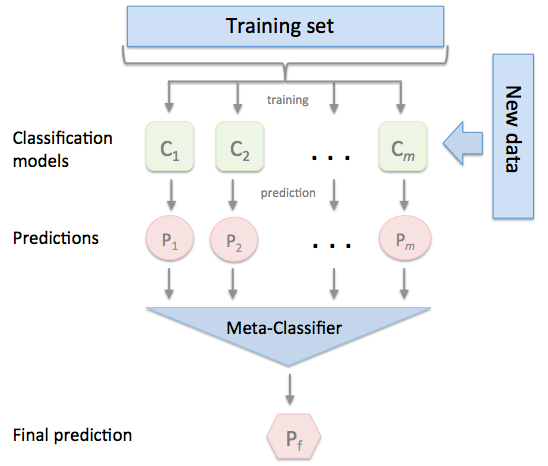

<div style="background-color:#CDA63A;
            color:white;
            text-align:left;
            width:70%;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto">

<b>In essence:</b> stacking algorithm uses multiple models to make baseline predictions, and using these models, trains a Meta-Classifier for better performance. Stacking allows us to use the strength of each individual estimator by taking advantage of their output as input for the final estimator. Therefore stacking can make predictions that have better performance than any single model in the ensemble.
</div>

<a id="1.1"></a>
## <b>1.1 <span style='color:#E1B12D'>Voting vs Stacking</span></b>

The fundamental difference between voting and stacking is how the final aggregation works. Voting aglomerates results of classifier's decisions by taking the class which appears in most cases or by weights of the predictions a whereas stacking performs the final aggregation by using a blender/meta classifier.

<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 margin: auto;
                                                 text-align: left;">
<b>Voting </b> - the algorithm has some constant method that gives answers.
    
<b>Stacking </b> - the algorithm takes advantage of the predictions as the new representation of the problem and creates another abstraction layer to learn how to predict the correct label having k votes.
</div>

Check this notebook for **<mark style="background-color:#CDA63A;color:white;border-radius:5px;opacity:1.0">MUCH more information</mark>** **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">about voting classifier</mark>**:

* [Voting Classifier for Better Results](https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results)

<a id="1.2"></a>
## <b>1.2 <span style='color:#E1B12D'>Stacking vs bagging and boosting</span></b>

1. **Bagging** (stands for Bootstrap Aggregating): we use bagging for combining weak learners (base models) of high variance. Bagging aims to produce a model with lower variance than the individual weak models. Bagging takes advantage of  Bootstrapping technique - sampling different sets of data from a given training set by using replacement. After bootstrapping the training dataset, we train the model on all the different sets and aggregate the result. Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (instead of samples of the training dataset).


2. **Boosting**: in boosting the learners are trained sequentially. The algorithm learns models sequentially in a very adaptive way (a base model depends on the previous ones) and combines them following a deterministic strategy. Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of correcting the predictions of prior models).

Bagging trains models in parallel, boosting trains the models sequentially. Stacking creates a new meta-model.

<a id="1.3"></a>
## <b>1.3 <span style='color:#E1B12D'>Framework</span></b>

The framework of a stacked ensemble consists of two or more base models (level-0 models) and a higher level meta model (level-1 model).

<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 margin: auto;
                                                 text-align: left;">
<b>Base-Models </b> (Level-0 Models): models that fit the training data and predict out-of-sample data.
    
<b>Meta-Model </b> (Level-1 Model): final estimator that fits on the prediction from base-models and learns how to best combine the predictions (the default classifier is a LogisticRegression.).
</div>

<div style="background-color:#CDA63A;
            color:white;
            text-align:left;
            width:70%;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto">

<b>In essence:</b> stacking algorithm uses multiple models to make baseline predictions, and using these models, trains a Meta-Classifier for better performance. Stacking allows us to use the strength of each individual estimator by taking advantage of their output as input for the final estimator. Therefore stacking can make predictions that have better performance than any single model in the ensemble.

</div>

<a id="1.4"></a>
## <b>1.4 <span style='color:#E1B12D'>Tuning hyperparameters in ensemble learning</span></b>

In our case, predictions from one machine learning model become predictors for another (next level). Taking advantage of such complex composite structures can reduce prediction error. The final model becomes more robust, but high efficiency comes at the price of much more effort: much more time, computational resources and much more complex structure.

Since the entire process is so complex we can think of it as a hyperparameters tuning strategy. This could be great material for different notebooks in the future!

<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 margin: auto;
                                                 text-align: left;">
There are many different strategies, but we also have a very fundamental approach here. First all single models of the first level are trained and tuned (hyperparameters are tuned separately for each model), - then the ensemble model(s). During the next step the process is repeated in iterative movement from left to right.
</div>

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span> Set-up</div>

<a id="2.1"></a>
## <b>2.1 <span style='color:#E1B12D'>Import Libraries</span></b>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

<a id="2.2"></a>
## <b>2.2 <span style='color:#E1B12D'>Import Data</span></b> 

In [4]:
try:
    raw_df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
except:
    raw_df = pd.read_csv('telco.csv')

<a id="2.3"></a>
## <b>2.3 <span style='color:#E1B12D'>Data Set Characteristics</span></b>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn.
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
* Demographic info about customers – gender, age range, and if they have partners and dependents.

The are no missing values in data set.

<a id="2.4"></a>
## <b>2.4 <span style='color:#E1B12D'>Dataset Attributes</span></b> 


* <code>customerID</code> - Customer ID

* <code>gender</code> - Whether the customer is a male or a female

* <code>SeniorCitizen</code> - Whether the customer is a senior citizen (1, 0)

* <code>Partner</code> - Whether the customer has a partner (Yes, No)

* <code>Dependents</code> - Whether the customer has dependents (Yes, No)

* <code>tenure</code> - Number of months the customer has stayed with the company

* <code>PhoneService</code> - Whether the customer has a phone service (Yes, No)

* <code>MultipleLines</code> - Whether the customer has multiple lines (Yes, No, No phone service)

* <code>InternetService</code> - Customer’s internet service provider (DSL, Fiber optic, No)

* <code>OnlineSecurity</code> - Whether the customer has online security (Yes, No, No internet service)

* <code>OnlineBackup</code> - Whether the customer has online backup or not (Yes, No, No internet service)

* <code>DeviceProtection</code> - Whether the customer has device protection (Yes, No, No internet service)

* <code>TechSupport</code> - Whether the customer has tech support (Yes, No, No internet service)

* <code>StreamingTV</code> - Whether the customer has streaming TV service (Yes, No, No internet service)

* <code>StreamingMovies</code> - Whether the customer has streaming movies service (Yes, No, No internet service)

* <code>Contract</code> - Indicates the type of the contract (Month-to-month, One year, Two year)

* <code>PaperlessBilling</code> - Whether the customer has paperless billing (Yes, No)

* <code>PaymentMethod</code> - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

* <code>MonthlyCharges</code> - Indicates the current monthly subscription cost of the customer

* <code>TotalCharges</code> - Indicates the total charges paid by the customer so far

* <code>Churn</code> - Indicates whether the customer churned

In [5]:
palette = ['#008080','#FF6347', '#E50000', '#D2691E'] # Creating color palette for plots

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span> Data preprocessing</div>

We don't need a customerID column, so I'll delete it.

In [6]:
df = raw_df.drop('customerID', axis=1)

<a id="3.1"></a>
## <b>3.1 <span style='color:#E1B12D'>Dealing with missing values in TotalCharges</span></b> 

In [7]:
 # df['TotalCharges'] = df['TotalCharges'].astype(float)

An error occured when trying to execule a code above: could not convert string to float: ''

The string to be converted must not contain any characters or symbols. The error occurs due to the incorrect initialization of value to a string variable.

We have probably empty strings in 'TotalCharges' colums, but as they were defined as string, they didn't appear as Null Values.

In [8]:
step1 = [len(i.split()) for i in df['TotalCharges']] # splitting individual elements of 'Total_Charges'
step2 = [i for i in range(len(step1)) if step1[i] != 1] # storing the index values of 'Total_Charges' where length is not equal to 1.
print('Number of entries with empty string: ', len(step2))

Number of entries with empty string:  11


We coud try to impute the missing values by building a model for that reason or fill them using some often used values in that kind of situations e.g. mean, median or mode, but it's simpler (and probably better) to just drop the coresponding rows from a dataset as the numbers of empty string is very low (11).

In [9]:
df = df.drop(step2, axis = 0).reset_index(drop=True) # Dropping rows with no values in 'Total_charges'

In [10]:
df['TotalCharges'] = df['TotalCharges'].astype(float) # Finally we can convert string to float in 'Total_charges' column

<a id="3.2"></a>
## <b>3.2 <span style='color:#E1B12D'>Dealing with duplicated values</span></b> 

In [11]:
print('Number of duplicated values in training dataset: ', df.duplicated().sum())

Number of duplicated values in training dataset:  22


In [12]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


<a id="3.3"></a>
## <b>3.3 <span style='color:#E1B12D'>Creating numerical and categorical lists</span></b> 

In [13]:
# distinction is based on the number of different values in the column
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding target:'Churn'

In [14]:
print('Numerical fetures: ',numeric_columns)
print('Categorical fetures: ',categoric_columns)

Numerical fetures:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical fetures:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span> Feature Engineering</div>

<a id="4.1"></a>
## <b>4.1 <span style='color:#E1B12D'>Train test split - stratified splitting</span></b>

Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

These dataset divisions are usually generated randomly according to a target variable. However, when doing so, the proportions of the target variable among the different splits can differ, especially in the case of small datasets.

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[['Churn']] = df[['Churn']].apply(le.fit_transform) # Applying LabelEncoder to 'Churn' column

X = df.drop('Churn', axis=1)
y = df['Churn']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

> Check this notebook for **<mark style="background-color:#E1B12D;color:white;border-radius:5px;opacity:1.0">MUCH more information</mark>** **<mark style="background-color:#3b3745;color:white;border-radius:5px;opacity:1.0">about dealing with imbalanced datasets</mark>**: [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)

<a id="4.2"></a>
## <b>4.2 <span style='color:#E1B12D'>Feature scaling</span></b>

In [17]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [18]:
col_names = numeric_columns
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

<a id="4.3"></a>
## <b>4.3 <span style='color:#E1B12D'>One hot Encoding</span></b>

In [19]:
print(categoric_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
# Encoding multiple columns. Unfortunately you cannot pass a list here so you need to copy-paste all printed categorical columns.
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), 
     ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
      'PhoneService', 'MultipleLines', 'InternetService', 
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
      'TechSupport', 'StreamingTV', 'StreamingMovies', 
      'Contract', 'PaperlessBilling', 'PaymentMethod']))

<a id="4.3.1"></a>
### <b>4.3.1 <span style='color:#E1B12D'>X_train encoding</span></b>

In [21]:
# Transforming
transformed = transformer.fit_transform(X_train)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = X_train.index
# Joining tables
X_train = pd.concat([X_train, transformed_df], axis=1)
# Dropping old categorical columns
X_train.drop(categoric_columns, axis=1, inplace=True)

<a id="4.3.2"></a>
### <b>4.3.2 <span style='color:#E1B12D'>X_test encoding</span></b>

In [22]:
# Transforming
transformed = transformer.fit_transform(X_test)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = X_test.index
# Joining tables
X_test = pd.concat([X_test, transformed_df], axis=1)
# Dropping old categorical columns
X_test.drop(categoric_columns, axis=1, inplace=True)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span> Model building</div>

In [23]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve

<a id="5.1"></a>
## <b>5.1 <span style='color:#F1A424'>Level-0 with 28 Models</span></b>

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
#from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [25]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=13) ))
estimators.append(('Bernoulli NB', BernoulliNB() ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13) ))
estimators.append(('Dummy Classifier', DummyClassifier(random_state=13) ))
estimators.append(('Extra Tree Classifier', ExtraTreeClassifier(random_state=13) ))
estimators.append(('Extra Trees Classifier', ExtraTreesClassifier(random_state=13) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('Gaussian Process Classifier', GaussianProcessClassifier(random_state=13) ))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
estimators.append(('Hist Gradient Boosting Classifier', HistGradientBoostingClassifier(random_state=13) ))
estimators.append(('KNN', KNeighborsClassifier() ))
estimators.append(('Label Propagation', LabelPropagation() ))
estimators.append(('Label Spreading', LabelSpreading() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('Logistic Regression CV', LogisticRegressionCV(max_iter=1000, random_state=13) ))
estimators.append(('MLPClassifier', MLPClassifier(max_iter=2000,random_state=13) ))
estimators.append(('Nearest Centroid', NearestCentroid() ))
estimators.append(('Passive Aggressive Classifier', PassiveAggressiveClassifier(random_state=13) ))
estimators.append(('Perceptron', Perceptron(random_state=13) ))
estimators.append(('RadiusNeighborsClassifier', RadiusNeighborsClassifier(radius=3) ))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13) ))
estimators.append(('Ridge Classifier', RidgeClassifier(random_state=13) ))
estimators.append(('Ridge Classifier CV', RidgeClassifierCV() ))
estimators.append(('SGDClassifier', SGDClassifier(random_state=13) ))
estimators.append(('SVC', SVC(random_state=13)))
estimators.append(('XGB', XGBClassifier(random_state=13) ))
estimators.append(('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13) ))

<a id="5.2"></a>
## <b>5.2 <span style='color:#F1A424'>Level-1 Model</span></b>

In [26]:
XGB = XGBClassifier(random_state=13)

<a id="5.3"></a>
## <b>5.3 <span style='color:#F1A424'>Create a stacking classifier</span></b>

In [27]:
from sklearn.ensemble import StackingClassifier
SC = StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6)
SC.fit(X_train, y_train)
y_pred = SC.predict(X_test)

print(f"\nStacking classifier training Accuracy: {SC.score(X_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {SC.score(X_test, y_test):0.2f}")


Stacking classifier training Accuracy: 0.70
Stacking classifier test Accuracy: 0.78


In [28]:
SC_Recall = recall_score(y_test, y_pred)
SC_Precision = precision_score(y_test, y_pred)
SC_f1 = f1_score(y_test, y_pred)
SC_accuracy = accuracy_score(y_test, y_pred)
SC_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1151  138]
 [ 247  217]]


In [29]:
from statistics import stdev
score = cross_val_score(SC, X_train, y_train, cv=5, scoring='recall', error_score="raise")
SC_cv_score = score.mean()
SC_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', SC_cv_score)
print('Cross Validation Recall standard deviation: ', SC_cv_stdev)

Cross Validation Recall scores are: [0.3655914  0.51971326 0.47482014 0.54676259 0.45519713]
Average Cross Validation Recall score:  0.47241690518552903
Cross Validation Recall standard deviation:  0.06978218131391915


In [30]:
ndf = [(SC_Recall, SC_Precision, SC_f1, SC_accuracy, SC_roc_auc, SC_cv_score, SC_cv_stdev)]

SC_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
SC_score.insert(0, 'Model', 'Random Forest')
SC_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest,0.467672,0.611268,0.529915,0.780376,0.680306,0.472417,0.069782


<a id="5.4"></a>
## <b>5.4 <span style='color:#F1A424'>AUC-ROC Curve</span></b>

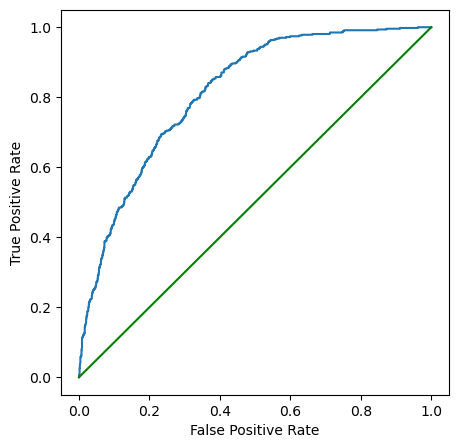

In [31]:
y_proba = SC.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
plot_auc_roc_curve(y_test, y_proba[:, 1])

<a id="5.5"></a>
## <b>5.5 <span style='color:#F1A424'>Precision-Recall Curve (PR curve)</span></b>

The precision-recall curve shows the tradeoff between precision and recalls for different thresholds.

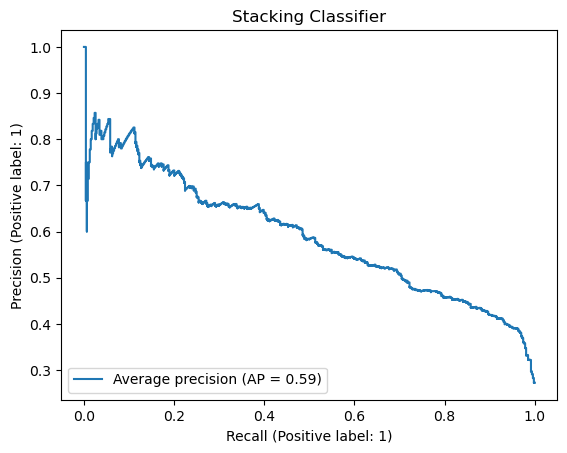

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    SC, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Stacking Classifier")

<a id="5.6"></a>
## <b>5.6 <span style='color:#F1A424'>This is just the beginning</span></b>

Creating the best model especcialt takeing advantage of stacking idea is a lengthy, iterative task!

In our case, predictions from one machine learning model become predictors for another (next level). Taking advantage of such complex composite structures can reduce prediction error. The final model becomes more robust, but high efficiency comes at the price of much more effort: much more time, computational resources and much more complex structure.

<div style="background-color:#CDA63A;
            color:white;
            text-align:left;
            width:70%;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto">
Without tuning hyperparameters we are not making progress here!
</div>

Since the entire process is so complex we can think of it as a hyperparameters tuning strategy. This could be great material for different notebooks in the future!

<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 margin: auto;
                                                 text-align: left;">
There are many different strategies, but we also have a very fundamental approach here. First all single models of the first level are trained and tuned (hyperparameters are tuned separately for each model), - then the ensemble model(s). During the next step the process is repeated in iterative movement from left to right.
</div>

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="6"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span> My other notebooks</div>

Here is a list of the notebooks I have completed so far:

* [How to create a meaningful EDA](https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda)
* [GridSearchCV + KFold CV: The Right Way](https://www.kaggle.com/code/marcinrutecki/gridsearchcv-kfold-cv-the-right-way)
* [Voting Classifier for Better Results](https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results)
* [SMOTE and Tomek Links for imbalanced data](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data)
* [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
* [Regression Models Evaluation Metrics](https://www.kaggle.com/code/marcinrutecki/regression-models-evaluation-metrics)
* [Clustering methods - comprehensive study](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)
* [Outlier detection methods!](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods)
* [Multicollinearity - detection and remedies](https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies)

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="7"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">7 <span style='color:#CDA63A'>|</span> References</div>

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/